# Document Classification of 20 NewsGroup Dataset

## Imports

In [ ]:
!pip install torchmetrics
!pip install pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tarfile
import os
import re
from collections import Counter, defaultdict
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import AutoModelForSequenceClassification

from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
#from sklearn.feature_extraction import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.cluster import KMeans
from IPython.display import Markdown, display
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Perceptron
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV


from torch.utils.data import Dataset, DataLoader
import torch
import torchmetrics
import torch.nn.functional as F
import pytorch_lightning as pl
from transformers import AutoModelForSequenceClassification
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *

from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string

from datetime import datetime, timedelta

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Data Download

In [ ]:
nltk_data_path = "/content/nltk_data"
nltk.data.path.append(nltk_data_path)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
newsgroups_file_path = r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/20_newsgroups/20_newsgroups"
mini_news_groups_file_path = r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/mini_newsgroups/mini_newsgroups"

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
newsgroups = tarfile.open(newsgroups_file_path)
newsgroups

mini_news_groups = tarfile.open(mini_news_groups_file_path)
mini_news_groups

with tarfile.open(newsgroups_file_path, 'r:gz') as file:
    file.extractall(path= r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/20_newsgroups")

with tarfile.open(mini_news_groups_file_path, "r:gz") as file:
    file.extractall(path= r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/mini_newsgroups")
"""

'\nnewsgroups = tarfile.open(newsgroups_file_path)\nnewsgroups\n\nmini_news_groups = tarfile.open(mini_news_groups_file_path)\nmini_news_groups\n\nwith tarfile.open(newsgroups_file_path, \'r:gz\') as file:\n    file.extractall(path= r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/20_newsgroups")\n\nwith tarfile.open(mini_news_groups_file_path, "r:gz") as file:\n    file.extractall(path= r"/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/mini_newsgroups")\n'

In [ ]:
data = []
target = []

directory = r'/content/drive/MyDrive/20 Group Document Classification/twenty+newsgroups/20_newsgroups/20_newsgroups'

for category in os.listdir(directory):
    category_path = os.path.join(directory, category)
    if os.path.isdir(category_path):
        for document in os.listdir(category_path):
            document_path = os.path.join(category_path, document)
            if os.path.isfile(document_path):
                with open(document_path, "r", encoding='latin1') as f:
                    data.append(f.read())
                    target.append(category)

df = pd.DataFrame({"text": data, "target": target})

In [ ]:
df["text"][0]

'Xref: cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.radio.amateur.misc:36913 rec.radio.cb:2650 rec.radio.shortwave:23053 sci.aeronautics:5975 sci.astro:34146 sci.econ:16233 sci.med:58068 sci.misc:8089 sci.space:60186 soc.bi:22986\nNewsgroups: rec.ham-radio,rec.nude,rec.radio.amateur.misc,rec.radio.cb,rec.radio.shortwave,sci.aeronautic,sci.aeronautics,sci.astro,sci.econ,sci.med,sci.misc,sci.space,soc.bi\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!noc.near.net!uunet!mcsun!news.funet.fi!ousrvr.oulu.fi!vttoulu.tko.vtt.fi!dfo\nFrom: Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Waldrop)\nSubject: Re: Celebrate Liberty!  1993\nMessage-ID: <1993Apr6.080012.25371@ousrvr.oulu.fi>\nFollowup-To: alt.test\nOriginator: dfo@vttoulu.tko.vtt.fi\nSender: news@ousrvr.oulu.fi\nReply-To: Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Waldrop)\nX-Telephone: 801-582-3318\nX-Us-Mail: P.O. Box 526175, Salt Lake City, UT 84152\nOrganization: Mor

In [ ]:
new_columns = ['Xref', 'Newsgroups', 'Path', 'From', 'Subject', 'Message-ID', 'Sender', 'Organization', 'References', 'Date', 'Lines', 'Content']

def parse_text(text):
    headers = {col: '' for col in new_columns}
    lines = text.split('\n')
    current_header = None

    for line in lines:
        if ': ' in line:
            parts = line.split(': ', 1)
            header = parts[0]
            if header in headers:
                headers[header] = parts[1]
                current_header = header
        elif current_header:
            headers['Content'] += line + '\n'

    return headers

parsed_data = df['text'].apply(parse_text)
parsed_df = pd.DataFrame(parsed_data.tolist())

parsed_df.head()

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",The Area Rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross..."
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),SSF Redesign: Constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),Re: HLV for Fred (was Re: Prefab Space Station?),<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),Re: Proton/Centaur?,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...


In [ ]:
def data_inspection(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [ ]:
data_inspection(parsed_df)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Xref,532,0,0.0,5521,object
Newsgroups,532,0,0.0,1571,object
Path,532,0,0.0,15754,object
From,532,0,0.0,8750,object
Subject,532,0,0.0,10504,object
Message-ID,532,0,0.0,19455,object
Sender,532,0,0.0,1505,object
Organization,532,0,0.0,3970,object
References,532,0,0.0,9520,object
Date,532,0,0.0,19374,object


Exploring the number of newsgroups per Document Category.

In [ ]:
df_expanded = parsed_df.assign(Newsgroups = parsed_df.Newsgroups.str.split(',')).explode('Newsgroups')

In [ ]:
df_expanded

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,rec.ham-radio,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,rec.nude,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,rec.radio.amateur.misc,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,rec.radio.cb,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,rec.radio.shortwave,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...
...,...,...,...,...,...,...,...,...,...,...,...,...
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: How to make the disks copy protected (cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,comp.os.msdos.programmer,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: How to make the disks copy protected (cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,alt.msdos.programmer,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: How to make the disks copy protected (cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...
19995,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: info on flux gate coils/magnetometer?,<CONRADIE.56.736003050@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<bbuck.735977235@Endor>,"Wed, 28 Apr 1993 13:17:30 GMT",19,\nIn article <bbuck.735977235@Endor> bbuck@End...


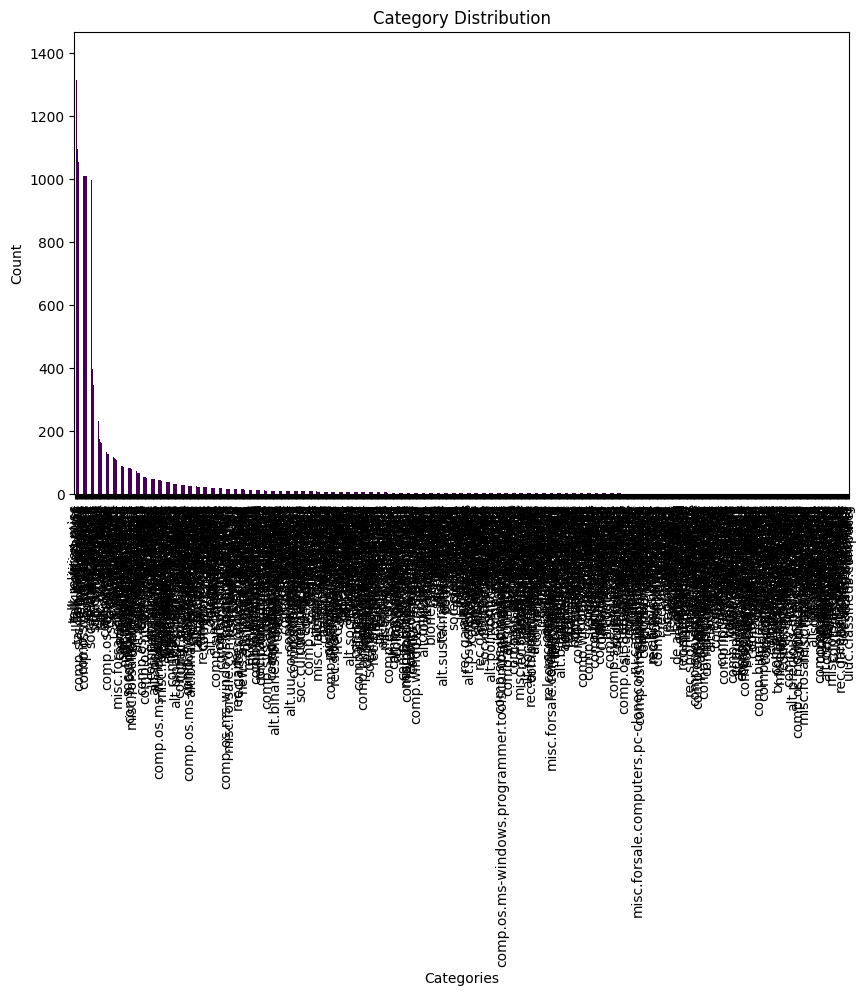

In [ ]:
plt.figure(figsize=(10,6))
df_expanded["Newsgroups"].value_counts().plot(kind="bar", colormap="viridis")
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

When we explore on newsgroup, we get a huge number of varius different newsgroups per each document. Hence, we look at placing these within 20 newsgroups instead imported externally.

We parse each of the documents in the tar file into a DataFrame.

### Data Pre-Processing

In [ ]:
df_final = pd.concat([parsed_df, df["target"]], axis = 1)

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content,target
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,Re: Celebrate Liberty! 1993,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...,sci.space
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",The Area Rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross...",sci.space
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),SSF Redesign: Constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...,sci.space
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),Re: HLV for Fred (was Re: Prefab Space Station?),<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),Re: Proton/Centaur?,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: **** And now serious: E-Magazine *****,<CONRADIE.54.736001925@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<1993Apr27.152314.28798@donau.et.tudelft.nl>,"Wed, 28 Apr 1993 12:58:45 GMT",28,\nIn article <1993Apr27.152314.28798@donau.et....,sci.electronics
19993,,sci.electronics,cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cm...,wtm@uhura.neoucom.edu (Bill Mayhew),Re: Why circuit boards are green?,<1993Apr29.131759.2156@uhura.neoucom.edu>,,Northeastern Ohio Universities College of Medi...,<1993Apr23.105152.20155@news.cs.tut.fi> <ulan....,"Thu, 29 Apr 1993 13:17:59 GMT",17,\nFiberglass boards are available in several c...,sci.electronics
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,"sci.electronics,comp.os.msdos.programmer,alt.m...",cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: How to make the disks copy protected (cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...,sci.electronics
19995,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),Re: info on flux gate coils/magnetometer?,<CONRADIE.56.736003050@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<bbuck.735977235@Endor>,"Wed, 28 Apr 1993 13:17:30 GMT",19,\nIn article <bbuck.735977235@Endor> bbuck@End...,sci.electronics


In [ ]:
data_inspection(df_final)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Xref,6,0,0.0,5521,object
Newsgroups,6,0,0.0,1571,object
Path,6,0,0.0,15754,object
From,6,0,0.0,8750,object
Subject,6,0,0.0,10504,object
Message-ID,6,0,0.0,19455,object
Sender,6,0,0.0,1505,object
Organization,6,0,0.0,3970,object
References,6,0,0.0,9520,object
Date,6,0,0.0,19374,object


In [ ]:
def text_preprocessing(text):
    if not isinstance(text, str):
        return ""

    # First, use regular expressions to strip out web site addresses
    text = re.sub(r'http[a-zA-Z0-9\&\?\=\?\/\:\.]+\b', ' ', text)
    text = re.sub(r'\<[^\<\>]+/', ' ', text)
    # Let us clear out all the punctuation except commas and full stops
    text = re.sub(r'[^\w\s.,]', ' ', text)
    # And clear out numbers
    text = re.sub(r'[0-9]+', ' ', text)
    # Then, add lowercase
    text = text.lower()

    # Now remove commas and ellipses
    text = text.replace(',', '').replace('...', '').replace('..', '')

    return text

In [ ]:
df_final["Content_Clean"] = df_final["Content"].map(text_preprocessing)
df_final["Subject"] = df_final["Subject"].map(text_preprocessing)

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content,target,Content_Clean
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,re celebrate liberty,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...,sci.space,\nbob.waldrop send the referred to message to ...
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",the area rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross...",sci.space,\ni read it refered to as the parabolic cross...
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),ssf redesign constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...,sci.space,\nssf is up for redesign again. let s do it r...
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),re hlv for fred was re prefab space station,<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space,\nin article c a.gzx news.cso.uiuc.edu jbh ...
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),re proton centaur,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space,\nin article apr . . zeus.calpoly.edu jgre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re and now serious e magazine,<CONRADIE.54.736001925@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<1993Apr27.152314.28798@donau.et.tudelft.nl>,"Wed, 28 Apr 1993 12:58:45 GMT",28,\nIn article <1993Apr27.152314.28798@donau.et....,sci.electronics,\nin article apr . . donau.et.tudelft.nl f...
19993,,sci.electronics,cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cm...,wtm@uhura.neoucom.edu (Bill Mayhew),re why circuit boards are green,<1993Apr29.131759.2156@uhura.neoucom.edu>,,Northeastern Ohio Universities College of Medi...,<1993Apr23.105152.20155@news.cs.tut.fi> <ulan....,"Thu, 29 Apr 1993 13:17:59 GMT",17,\nFiberglass boards are available in several c...,sci.electronics,\nfiberglass boards are available in several c...
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,"sci.electronics,comp.os.msdos.programmer,alt.m...",cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re how to make the disks copy protected cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...,sci.electronics,\nin article sehari. du .cc.iastate.edu s...
19995,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re info on flux gate coils magnetometer,<CONRADIE.56.736003050@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<bbuck.735977235@Endor>,"Wed, 28 Apr 1993 13:17:30 GMT",19,\nIn article <bbuck.735977235@Endor> bbuck@End...,sci.

In [ ]:
print("Before","----------------------------------->>>>>\n",df_final["Content"][7],"\n-------------------------------------------------------------------------------------------------------------------------------------------")
print("After","---------------------------------->>>>>\n",df_final["Content_Clean"][7])

Before ----------------------------------->>>>>
 
The following are my thoughts on a meeting that I, Hugh Kelso, and Bob Lilly
had with an aide of Sen. Patty Murrays.  We were there to discuss SSTO, and
commercial space.  This is how it went...



After receiving a packet containing a presentation on the benifits of SSTO,
I called and tried to schedule a meeting with our local Senator (D) Patty
Murray, Washington State.  I started asking for an hour, and when I heard
the gasp on the end of the phone, I quickly backed off to 1/2 an hour.
Later in that conversation, I learned that a standard appointment is 15 minutes.

We got the standard bozo treatment.  That is, we were called back by an aide,
who scheduled a meeting with us, in order to determine that we were not
bozos, and to familiarize himself with the material, and to screen it, to 
make sure that it was appropriate to take the senators time with that material.

Well, I got allocated 1/2 hour with Sen. Murrays aide, and we ended u

In [ ]:
def remove_stopwords(text):
  stop = set(stopwords.words("english"))
  text = [word for word in text.split() if word not in stop]
  text = ' '.join(x for x in text)
  return text

In [ ]:
df_final["Content_Clean_Stop"] = df_final["Content_Clean"].map(remove_stopwords)

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content,target,Content_Clean,Content_Clean_Stop
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,re celebrate liberty,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...,sci.space,\nbob.waldrop send the referred to message to ...,bob.waldrop send referred message lot apparent...
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",the area rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross...",sci.space,\ni read it refered to as the parabolic cross...,read refered parabolic cross section rule idea...
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),ssf redesign constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...,sci.space,\nssf is up for redesign again. let s do it r...,ssf redesign again. let right time let step ba...
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),re hlv for fred was re prefab space station,<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space,\nin article c a.gzx news.cso.uiuc.edu jbh ...,article c a.gzx news.cso.uiuc.edu jbh uxa.cso....
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),re proton centaur,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space,\nin article apr . . zeus.calpoly.edu jgre...,article apr . . zeus.calpoly.edu jgreen trumpe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re and now serious e magazine,<CONRADIE.54.736001925@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<1993Apr27.152314.28798@donau.et.tudelft.nl>,"Wed, 28 Apr 1993 12:58:45 GMT",28,\nIn article <1993Apr27.152314.28798@donau.et....,sci.electronics,\nin article apr . . donau.et.tudelft.nl f...,article apr . . donau.et.tudelft.nl ferry dute...
19993,,sci.electronics,cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cm...,wtm@uhura.neoucom.edu (Bill Mayhew),re why circuit boards are green,<1993Apr29.131759.2156@uhura.neoucom.edu>,,Northeastern Ohio Universities College of Medi...,<1993Apr23.105152.20155@news.cs.tut.fi> <ulan....,"Thu, 29 Apr 1993 13:17:59 GMT",17,\nFiberglass boards are available in several c...,sci.electronics,\nfiberglass boards are available in several c...,fiberglass boards available several colors. si...
19994,cantaloupe.srv.cs.cmu.edu sci.electronics:5450...,"sci.electronics,comp.os.msdos.programmer,alt.m...",cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re how to make the disks copy protected cont...,<CONRADIE.55.736002589@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<sehari.735962071@du139-201.cc.iastate.edu>,"Wed, 28 Apr 1993 13:09:49 GMT",31,\nIn article <sehari.735962071@du139-201.cc.ia...,sci.electronics,\nin article sehari. du .cc.iastate.edu s...,article s

In [ ]:
print("Before","----------------------------------->>>>>\n",df_final["Content_Clean"][7],"\n-------------------------------------------------------------------------------------------------------------------------------------------")
print("After","---------------------------------->>>>>\n",df_final["Content_Clean_Stop"][7])

Before ----------------------------------->>>>>
 
the following are my thoughts on a meeting that i hugh kelso and bob lilly
had with an aide of sen. patty murrays.  we were there to discuss ssto and
commercial space.  this is how it went



after receiving a packet containing a presentation on the benifits of ssto
i called and tried to schedule a meeting with our local senator  d  patty
murray washington state.  i started asking for an hour and when i heard
the gasp on the end of the phone i quickly backed off to     an hour.
later in that conversation i learned that a standard appointment is   minutes.

we got the standard bozo treatment.  that is we were called back by an aide
who scheduled a meeting with us in order to determine that we were not
bozos and to familiarize himself with the material and to screen it to 
make sure that it was appropriate to take the senators time with that material.

well i got allocated     hour with sen. murrays aide and we ended up talking
to him for

In [ ]:
# Word Tokenisation
def word_tokenisation(text):
    word_tokeniser = nltk.word_tokenize(text)
    word_tokens = []
    for word in word_tokeniser:
        word_tokens.append(word)
    return word_tokens

# Sentence Tokenisation
def sentence_tokenisation(text):
    sentence_tokeniser = nltk.sent_tokenize(text)
    sentence_tokens = []
    for sentence in sentence_tokeniser:
        sentence_tokens.append(sentence.split())
    return sentence_tokens

In [ ]:
df_final["Content_words"] = df_final["Content_Clean"].apply(word_tokenisation)

In [ ]:
df_final["Content_sentences"] = df_final["Content_Clean"].apply(sentence_tokenisation)

In [ ]:
def remove_single_letters(text):
    words = text.split()
    cleaned_words = []
    for word in words:
        if len(word) > 1:
            cleaned_words.append(word)
    return ' '.join(cleaned_words)

In [ ]:
df_final["Content_Clean_Stopw"] = df_final["Content_Clean_Stop"].map(remove_single_letters)
df_final["Word_tokens"] = df_final["Content_Clean_Stopw"].apply(word_tokenisation)

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content,target,Content_Clean,Content_Clean_Stop,Content_words,Content_sentences,Content_Clean_Stopw,Word_tokens
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,re celebrate liberty,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...,sci.space,\nbob.waldrop send the referred to message to ...,bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, the, referred, to, message...","[[bob.waldrop, send, the, referred, to, messag...",bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, referred, message, lot, ap..."
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",the area rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross...",sci.space,\ni read it refered to as the parabolic cross...,read refered parabolic cross section rule idea...,"[i, read, it, refered, to, as, the, parabolic,...","[[i, read, it, refered, to, as, the, parabolic...",read refered parabolic cross section rule idea...,"[read, refered, parabolic, cross, section, rul..."
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),ssf redesign constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...,sci.space,\nssf is up for redesign again. let s do it r...,ssf redesign again. let right time let step ba...,"[ssf, is, up, for, redesign, again, ., let, s,...","[[ssf, is, up, for, redesign, again.], [let, s...",ssf redesign again. let right time let step ba...,"[ssf, redesign, again, ., let, right, time, le..."
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),re hlv for fred was re prefab space station,<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space,\nin article c a.gzx news.cso.uiuc.edu jbh ...,article c a.gzx news.cso.uiuc.edu jbh uxa.cso....,"[in, article, c, a.gzx, news.cso.uiuc.edu, jbh...","[[in, article, c, a.gzx, news.cso.uiuc.edu, jb...",article a.gzx news.cso.uiuc.edu jbh uxa.cso.ui...,"[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c..."
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),re proton centaur,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space,\nin article apr . . zeus.calpoly.edu jgre...,article apr . . zeus.calpoly.edu jgreen trumpe...,"[in, article, apr, ., ., zeus.calpoly.edu, jgr...","[[in, article, apr, .], [.], [zeus.calpoly.edu...",article apr zeus.calpoly.edu jgreen trumpet.ca...,"[article, apr, zeus.calpoly.edu, jgreen, trump..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re and now serious e magazine,<CONRADIE.54.736001925@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<1993Apr27.152314.28798@donau.et.tudelft.nl>,"Wed, 28 Apr 1993 12:58:45 GMT",28,\nIn article <1993Apr27.152314.28798@donau.et....,sci.electronics,\nin article apr . . donau.et.tu

In [ ]:
def lemmatisation(df):
    # Initialise lemmatiser
    nltk_lemmatizer = nltk.stem.WordNetLemmatizer()
    # Tag map
    tag_map_nltk = defaultdict(lambda : wn.NOUN)
    tag_map_nltk["J"] = wn.ADJ
    tag_map_nltk["V"] = wn.VERB
    tag_map_nltk["R"] = wn.ADV
    # Apply Lemmatisation
    df["Lemmatised_words"] = df["Word_tokens"].apply(lambda x: [nltk_lemmatizer.lemmatize(token, tag_map_nltk[tag[0]]) for token, tag in nltk.pos_tag(x)])
    return df

In [ ]:
df_final = lemmatisation(df_final)

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,Lines,Content,target,Content_Clean,Content_Clean_Stop,Content_words,Content_sentences,Content_Clean_Stopw,Word_tokens,Lemmatised_words
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,re celebrate liberty,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",15,\nBob.Waldrop send the referred to message to ...,sci.space,\nbob.waldrop send the referred to message to ...,bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, the, referred, to, message...","[[bob.waldrop, send, the, referred, to, messag...",bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, referred, message, lot, ap...","[bob.waldrop, send, refer, message, lot, appar..."
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",the area rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",12,"\nI read it refered to as the ""parabolic cross...",sci.space,\ni read it refered to as the parabolic cross...,read refered parabolic cross section rule idea...,"[i, read, it, refered, to, as, the, parabolic,...","[[i, read, it, refered, to, as, the, parabolic...",read refered parabolic cross section rule idea...,"[read, refered, parabolic, cross, section, rul...","[read, refer, parabolic, cross, section, rule,..."
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),ssf redesign constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,89,\nSSF is up for redesign again. Let's do it r...,sci.space,\nssf is up for redesign again. let s do it r...,ssf redesign again. let right time let step ba...,"[ssf, is, up, for, redesign, again, ., let, s,...","[[ssf, is, up, for, redesign, again.], [let, s...",ssf redesign again. let right time let step ba...,"[ssf, redesign, again, ., let, right, time, le...","[ssf, redesign, again, ., let, right, time, le..."
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),re hlv for fred was re prefab space station,<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space,\nin article c a.gzx news.cso.uiuc.edu jbh ...,article c a.gzx news.cso.uiuc.edu jbh uxa.cso....,"[in, article, c, a.gzx, news.cso.uiuc.edu, jbh...","[[in, article, c, a.gzx, news.cso.uiuc.edu, jb...",article a.gzx news.cso.uiuc.edu jbh uxa.cso.ui...,"[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c...","[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c..."
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),re proton centaur,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space,\nin article apr . . zeus.calpoly.edu jgre...,article apr . . zeus.calpoly.edu jgreen trumpe...,"[in, article, apr, ., ., zeus.calpoly.edu, jgr...","[[in, article, apr, .], [.], [zeus.calpoly.edu...",article apr zeus.calpoly.edu jgreen trumpet.ca...,"[article, apr, zeus.calpoly.edu, jgreen, trump...","[article, apr, zeus.calpoly.edu, jgreen, trump..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re and now serious e magazine,<CONRADIE.

## Data Analysis

### Measuring the Class Imbalance

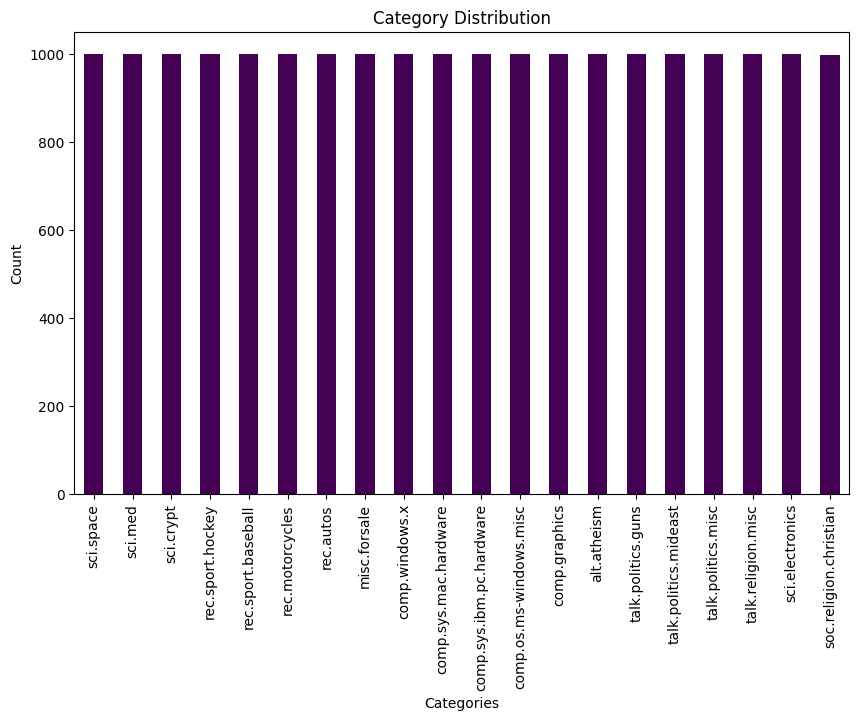

In [ ]:
# Visualize the distribution of categories
plt.figure(figsize=(10,6))
df_final["target"].value_counts().plot(kind="bar", colormap="viridis")
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

Mini NewsGroup Analysis

In [ ]:
newsgroups = df_final["target"].unique()

In [ ]:
df_final["num_words"] = df_final["Content_words"].apply(len)
df_final["num_sentences"] = df_final["Content_sentences"].apply(len)
df_final["num_char"] = df_final["Content_Clean"].str.len()
df_final["num_vocab"] = df_final["Content_words"].apply(set).apply(len)
df_final["lexical_diversity"] = df_final["num_words"] / df_final["num_vocab"]
df_final["ave_word_length"] = df_final["num_char"] / df_final["num_words"]

In [ ]:
df_final

,Xref,Newsgroups,Path,From,Subject,Message-ID,Sender,Organization,References,Date,...,Content_sentences,Content_Clean_Stopw,Word_tokens,Lemmatised_words,num_words,num_sentences,num_char,num_vocab,lexical_diversity,ave_word_length
0,cantaloupe.srv.cs.cmu.edu rec.nude:15829 rec.r...,"rec.ham-radio,rec.nude,rec.radio.amateur.misc,...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Wald...,re celebrate liberty,<1993Apr6.080012.25371@ousrvr.oulu.fi>,news@ousrvr.oulu.fi,"Morning Glory Productions, SLC, UT",<1993Apr5.201235.15980@dsd.es.com>,"Tue, 6 Apr 1993 08:00:12 GMT",...,"[[bob.waldrop, send, the, referred, to, messag...",bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, referred, message, lot, ap...","[bob.waldrop, send, refer, message, lot, appar...",54,14,423,39,1.384615,7.833333
1,,sci.space,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,"flb@flb.optiplan.fi (""F.Baube[tm]"")",the area rule,<C528Es.Dts.1@cs.cmu.edu>,news+@cs.cmu.edu,[via International Space University],,"Tue, 6 Apr 1993 11:39:26 GMT",...,"[[i, read, it, refered, to, as, the, parabolic...",read refered parabolic cross section rule idea...,"[read, refered, parabolic, cross, section, rul...","[read, refer, parabolic, cross, section, rule,...",73,2,459,53,1.377358,6.287671
2,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,szabo@techbook.com (Nick Szabo),ssf redesign constellation,<C51z6E.CL1@techbook.com>,,TECHbooks --- Public Access UNIX --- (503) 220...,,6 Apr 93 08:20:38 GMT,...,"[[ssf, is, up, for, redesign, again.], [let, s...",ssf redesign again. let right time let step ba...,"[ssf, redesign, again, ., let, right, time, le...","[ssf, redesign, again, ., let, right, time, le...",714,30,4325,341,2.093842,6.057423
3,,sci.space,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,aws@iti.org (Allen W. Sherzer),re hlv for fred was re prefab space station,<1993Apr6.124456.14123@iti.org>,,Evil Geniuses for a Better Tomorrow,<4APR199319574048@judy.uh.edu> <1993Apr5.14300...,6 Apr 93 12:44:56 GMT,...,"[[in, article, c, a.gzx, news.cso.uiuc.edu, jb...",article a.gzx news.cso.uiuc.edu jbh uxa.cso.ui...,"[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c...","[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c...",153,6,1016,107,1.429907,6.640523
4,cantaloupe.srv.cs.cmu.edu talk.politics.space:...,"talk.politics.space,sci.space",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,prb@access.digex.com (Pat),re proton centaur,<1r2aii$ivs@access.digex.net>,,Express Access Online Communications USA,<1993Apr19.202209.5655@leland.Stanford.EDU> <1...,20 Apr 1993 22:12:34 -0400,...,"[[in, article, apr, .], [.], [zeus.calpoly.edu...",article apr zeus.calpoly.edu jgreen trumpet.ca...,"[article, apr, zeus.calpoly.edu, jgreen, trump...","[article, apr, zeus.calpoly.edu, jgreen, trump...",95,5,518,65,1.461538,5.452632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,,sci.electronics,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,CONRADIE@firga.sun.ac.za (Gerrit Conradie),re and now serious e magazine,<CONRADIE.54.736001925@firga.sun.ac.za>,news@hippo.ru.ac.za (Usenet News Admin),"University of Stellenbosch, SA",<1993Apr27.152314.28798@donau.et.tudelft.nl>,"Wed, 28 Apr 1993 12:58:45 GMT",...,"[[in, article, apr, .], [.], [donau.et.tudelft...",article apr donau.et.tudelft.nl ferry dutentb....,"[article, apr, donau.et.tudelft.nl, ferry, dut...","[article, apr, donau.et.tudelft.nl, ferry, dut...",184,11,1096,107,1.719626,5.956522
19993,,sci.electronics,cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cm...,wtm@uhura.neoucom.edu (Bill Mayhew),re why circuit boards are green,<1993Apr29.131759.2156@uhura.neoucom.edu>,,Northeastern Ohio Universities College of Medi...,<1993Apr23.105152.20155@news.cs.tut.fi> <ulan....,"Thu, 29 Apr 1993 13:17:59 GMT",...,"[[fiberglass, boards, are, available, in, seve...",fiberglass boards available several colors. si...,"[fiberglass, boards, avail

In [ ]:
newsgroup_df = df_final.groupby("target").agg({
    "num_words": "mean",
    "num_sentences": "mean",
    "num_char": "mean",
    "num_vocab": "mean",
    "lexical_diversity": "mean",
    "ave_word_length": "mean"
}).reset_index()

In [ ]:
newsgroup_df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,target,num_words,num_sentences,num_char,num_vocab,lexical_diversity,ave_word_length
0,alt.atheism,313.245000,16.482000,1817.201000,150.254000,1.748059,inf
1,comp.graphics,231.917000,13.559000,1447.349000,108.446000,1.508719,inf
2,comp.os.ms-windows.misc,424.123000,13.398000,2021.307000,124.609000,1.942004,inf
3,comp.sys.ibm.pc.hardware,165.726000,9.267000,966.779000,95.294000,1.542070,inf
4,comp.sys.mac.hardware,161.135000,9.136000,937.351000,92.644000,1.512590,inf
5,comp.windows.x,258.517000,13.278000,1595.240000,114.221000,1.567538,inf
6,misc.forsale,115.101000,9.620000,779.828000,72.802000,1.379930,inf
7,rec.autos,198.940000,10.957000,1134.144000,114.213000,1.548063,inf
8,rec.motorcycles,173.176000,9.431000,1020.526000,107.490000,1.475520,inf
9,rec.sport.baseball,208.864000,14.956000,1213.450000,115.383000,1.592639,inf


#### Word Clouds

In [ ]:
text1 = " ".join(word for word in df_final["Content_Clean_Stopw"])

In [ ]:
word_cloud = WordCloud(
    collocations=False,
    background_color="white",
    width=2048,
    height=1080
).generate(text1)

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
newsgroups = df_final["target"].unique().tolist()

In [ ]:
def wordcloud_generator(newsgroups):
    for newsgroup in newsgroups:
        # Filter DataFrame by newsgroup
        text = " ".join(df_final[df_final["target"] == newsgroup]["Content_Clean_Stopw"])

        # Generate word cloud for the current newsgroup
        word_cloud = WordCloud(
            collocations=False,
            background_color="white",
            width=2048,
            height=1080
        ).generate(text)

        #Displaying the word cloud
        plt.imshow(word_cloud, interpolation = "bilinear")
        plt.axis("off")
        plt.show()

        print(f"Word cloud for '{newsgroup}': {len(text.split())} words")

In [ ]:
wordcloud_generator(newsgroups)

### N-Gram Analysis

## Data Preparatation

In [ ]:
df_ml = df_final.drop(columns = {"num_sentences", "num_words", "num_char", "num_vocab", "lexical_diversity", "ave_word_length", "Content_Clean_Stop", "From", "Message-ID", "Sender", "References", "Date", "Xref", "Path", "Organization", "Content_Clean", "Content_words", "Content_sentences", "Newsgroups"})

In [ ]:
df_ml

,Subject,Lines,Content,target,Content_Clean_Stopw,Word_tokens,Lemmatised_words
0,re celebrate liberty,15,\nBob.Waldrop send the referred to message to ...,sci.space,bob.waldrop send referred message lot apparent...,"[bob.waldrop, send, referred, message, lot, ap...","[bob.waldrop, send, refer, message, lot, appar..."
1,the area rule,12,"\nI read it refered to as the ""parabolic cross...",sci.space,read refered parabolic cross section rule idea...,"[read, refered, parabolic, cross, section, rul...","[read, refer, parabolic, cross, section, rule,..."
2,ssf redesign constellation,89,\nSSF is up for redesign again. Let's do it r...,sci.space,ssf redesign again. let right time let step ba...,"[ssf, redesign, again, ., let, right, time, le...","[ssf, redesign, again, ., let, right, time, le..."
3,re hlv for fred was re prefab space station,22,\nIn article <C5133A.Gzx@news.cso.uiuc.edu> jb...,sci.space,article a.gzx news.cso.uiuc.edu jbh uxa.cso.ui...,"[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c...","[article, a.gzx, news.cso.uiuc.edu, jbh, uxa.c..."
4,re proton centaur,15,\nIn article <1993Apr20.211638.168730@zeus.cal...,sci.space,article apr zeus.calpoly.edu jgreen trumpet.ca...,"[article, apr, zeus.calpoly.edu, jgreen, trump...","[article, apr, zeus.calpoly.edu, jgreen, trump..."
...,...,...,...,...,...,...,...
19992,re and now serious e magazine,28,\nIn article <1993Apr27.152314.28798@donau.et....,sci.electronics,article apr donau.et.tudelft.nl ferry dutentb....,"[article, apr, donau.et.tudelft.nl, ferry, dut...","[article, apr, donau.et.tudelft.nl, ferry, dut..."
19993,re why circuit boards are green,17,\nFiberglass boards are available in several c...,sci.electronics,fiberglass boards available several colors. si...,"[fiberglass, boards, available, several, color...","[fiberglass, board, available, several, color,..."
19994,re how to make the disks copy protected cont...,31,\nIn article <sehari.735962071@du139-201.cc.ia...,sci.electronics,article sehari. du .cc.iastate.edu sehari iast...,"[article, sehari, ., du, .cc.iastate.edu, seha...","[article, sehari, ., du, .cc.iastate.edu, seha..."
19995,re info on flux gate coils magnetometer,19,\nIn article <bbuck.735977235@Endor> bbuck@End...,sci.electronics,article bbuck. endor bbuck endor.sim.es.com br...,"[article, bbuck, ., endor, bbuck, endor.sim.es...","[article, bbuck, ., endor, bbuck, endor.sim.es..."


In [ ]:
df_ml["Subject:Content"] = df_ml.apply(lambda row: " ".join([str(row["Subject"]), str(row["Content_Clean_Stopw"])]), axis=1)

In [ ]:
X = df_ml["Subject:Content"]
y = df_ml["target"]

In [ ]:
df_ml["Subject:Content"]

0        re  celebrate liberty     bob.waldrop send ref...
1        the area rule read refered parabolic cross sec...
2        ssf redesign  constellation ssf redesign again...
3        re  hlv for fred  was re  prefab space station...
4        re  proton centaur  article apr zeus.calpoly.e...
                               ...                        
19992    re       and now serious  e magazine       art...
19993    re  why circuit boards are green  fiberglass b...
19994    re  how to make the disks copy protected  cont...
19995    re  info on flux gate coils magnetometer  arti...
19996    re  lead acid batteries part      article h.lu...
Name: Subject:Content, Length: 19997, dtype: object

In [ ]:
df_ml["target"]

0              sci.space
1              sci.space
2              sci.space
3              sci.space
4              sci.space
              ...       
19992    sci.electronics
19993    sci.electronics
19994    sci.electronics
19995    sci.electronics
19996    sci.electronics
Name: target, Length: 19997, dtype: object

In [ ]:
# Divide the training, testing sets into a ration of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 88)

In [ ]:
n_components = 5
labels = df_ml.target
true_k = np.unique(labels).shape[0]

In [ ]:
# Count to TF-IDF
vectorizer = TfidfVectorizer(analyzer = "word", max_features = 10000)

In [ ]:
X_vectorized_train = vectorizer.fit_transform(X_train)
y_vectorized_train = vectorizer.fit_transform(y_train)

In [ ]:
X_vectorized_test = vectorizer.transform(X_test)
y_vectorized_test = vectorizer.transform(y_test)

In [ ]:
y_vectorized_train

<13997x32 sparse matrix of type '<class 'numpy.float64'>'
	with 38370 stored elements in Compressed Sparse Row format>

In [ ]:
X_vectorized_train

<13997x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1162389 stored elements in Compressed Sparse Row format>

In [ ]:
X_dense_train = X_vectorized_train.toarray()
y_dense_train = y_vectorized_train.toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_vectorized_train = scaler.fit_transform(X_vectorized_train.toarray())

# Model Training

## Machine Learning Models

We initially train all the models using a CountVectorizer() and a TF-IDF Transformer(). Afterwards, we experiment with different pipelines on the best performing models, to see how these affect the results.

### BASELINE_MODEL: Dummy Classifier

In [ ]:
clf_pipe_dummy = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DummyClassifier(strategy='most_frequent'))
])

In [ ]:
clf_pipe_dummy.fit(X_train, y_train)

In [ ]:
clf_pipe_dummy.score(X_test, y_test)

### Decision Trees

In [ ]:
clf_pipe_dt = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier())
])

In [ ]:
clf_pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast', "These test results are worrysome", 'graphic cards are expensive',
           "let's check the diagnosis", 'how did the surgery go'] # list of sentences to classify
predicted = clf_pipe_dt.predict(docs_new) # predicting the labels (category) for our exemple sentences

#Printing sentences and the predicted labels
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

In [ ]:
clf_pipe_dt.score(X_test, y_test)

0.6273333333333333

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.53      0.50       294
           comp.graphics       0.52      0.53      0.52       299
 comp.os.ms-windows.misc       0.61      0.63      0.62       321
comp.sys.ibm.pc.hardware       0.53      0.50      0.51       315
   comp.sys.mac.hardware       0.61      0.65      0.63       278
          comp.windows.x       0.57      0.58      0.57       298
            misc.forsale       0.71      0.72      0.72       275
               rec.autos       0.64      0.67      0.66       285
         rec.motorcycles       0.80      0.77      0.79       323
      rec.sport.baseball       0.69      0.71      0.70       312
        rec.sport.hockey       0.83      0.81      0.82       310
               sci.crypt       0.81      0.75      0.78       301
         sci.electronics       0.47      0.49      0.48       281
                 sci.med       0.68      0.63      

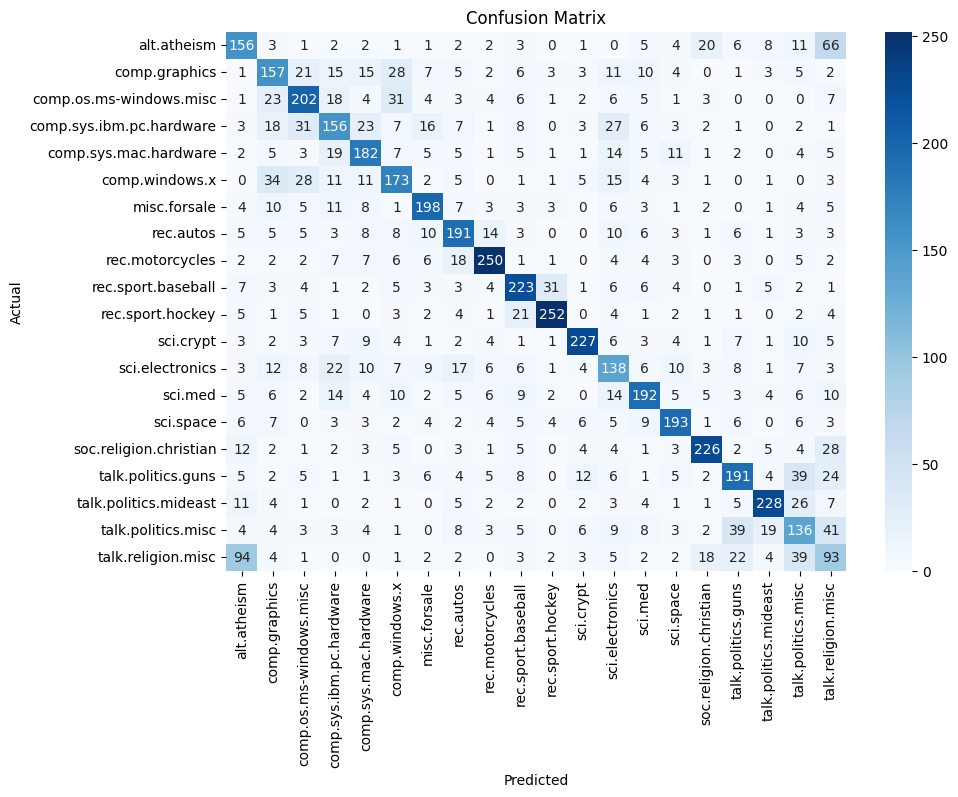

In [ ]:
# Predict on the test set
y_pred = clf_pipe_dt.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate and print all performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf_pipe_dt.classes_, yticklabels=clf_pipe_dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
clf_pipe_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

In [ ]:
clf_pipe_rf.fit(X_train, y_train)

In [ ]:
clf_pipe_rf.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_rf.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Linear SVC

In [ ]:
clf_pipe_linsvc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [ ]:
clf_pipe_linsvc.fit(X_train, y_train)

In [ ]:
clf_pipe_linsvc.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_linsvc.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Light GBM

In [ ]:
clf_pipe_lgbm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LGBMClassifier())
])

In [ ]:
clf_pipe_lgbm.fit(X_train, y_train)

In [ ]:
clf_pipe_lgbm.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_lgbm.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Logistic Regression

In [ ]:
clf_pipe_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

In [ ]:
clf_pipe_lr.fit(X_train, y_train)

In [ ]:
clf_pipe_lr.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_lr.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### SVM

In [ ]:
clf_pipe_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC())
])

In [ ]:
clf_pipe_svm.fit(X_train, y_train)

In [ ]:
clf_pipe_svm.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_lgbm.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Naive Bayes

In [ ]:
clf_pipe_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [ ]:
clf_pipe_nb.fit(X_train, y_train)

In [ ]:
clf_pipe_nb.score(X_test, y_test)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_nb.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Gradient Boosting

In [ ]:
clf_pipe_gb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', GradientBoostingClassifier())
])

In [ ]:
clf_pipe_gb.fit(X_train, y_train)

In [ ]:
clf_pipe_gb.score(X_test, y_test)

In [ ]:
from sklearn import metrics  #classification evaluation metrics: accuracy score, confusion matrix, etc.

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_gb.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### XGBoost

In [ ]:
le = LabelEncoder()
le.fit(y)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
set(y_train_le)

In [ ]:
clf_pipe_xgb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', XGBClassifier())
])

In [ ]:
clf_pipe_xgb.fit(X_train, y_train_le)

In [ ]:
clf_pipe_xgb.score(X_test, y_test_le)

In [ ]:

#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_xgb.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### AdaBoost

In [ ]:
clf_pipe_gb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier())
])

In [ ]:
clf_pipe_gb.fit(X_train, y_train)

In [ ]:
clf_pipe_gb.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_gb.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### K-Nearest-Neighbours

In [ ]:
clf_pipe_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

In [ ]:
clf_pipe_knn.fit(X_train, y_train)

In [ ]:
clf_pipe_knn.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_knn.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Perceptron

In [ ]:
clf_pipe_perceptron = Pipeline([
    ('vect', CountVectorizer()),
    ('scaler', MaxAbsScaler()),
    ('clf', Perceptron())
])

In [ ]:
clf_pipe_perceptron.fit(X_train, y_train)

In [ ]:
clf_pipe_perceptron.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_perceptron.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

The best performing models within the Machine Learning landscape were: Naive Bayes, Linear SVC, Logistic Regression and SVM.

### Bagging Classifier

In [ ]:
clf_pipe_bagging = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50))
])

In [ ]:
clf_pipe_bagging.fit(X_train, y_train)

In [ ]:
clf_pipe_bagging.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_bagging.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

### Experimentation with best ML Algorithms

We know experiment with different Pipeline Configurations:
- Hashing Vectorizer + TF-IDF Transformer
- Count Vectorizer + TF_IDF Transformer
- TFIDF Vectorizer
- Count Vectorizer + TF-IDF Transformer
- Count Vectorizer + Normalizer


#### Adding a Normaliser to the Pipeline

In [ ]:
clf_pipe_count_lgbm_norm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('norm', Normalizer()),
    ('clf', LGBMClassifier())
])

In [ ]:
clf_pipe_count_lgbm_norm.fit(X_train, y_train)

In [ ]:
clf_pipe_count_lgbm_norm.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_count_lgbm_norm.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

In [ ]:
clf_pipe_linsvc_norm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('norm', Normalizer()),
    ('clf', LinearSVC())
])

In [ ]:
clf_pipe_linsvc_norm.fit(X_train, y_train)

In [ ]:
clf_pipe_linsvc_norm.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_linsvc_norm.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

- A normaliser does not have an impact on the entire dataset.

#### Using the Hashing Vectorizer

In [ ]:
clf_pipe_hash_norm = Pipeline([
    ('hash', HashingVectorizer()),
    ('norm', Normalizer()),
    ('clf', LinearSVC())
])

In [ ]:
clf_pipe_hash_norm.fit(X_train, y_train)

In [ ]:
clf_pipe_hash_norm.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_hash_norm.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

In [ ]:
clf_pipe_count_hash_SVC = Pipeline([
    ('vect', HashingVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('norm', Normalizer()),
    ('clf', LinearSVC())
])

In [ ]:
clf_pipe_count_hash_SVC.fit(X_train, y_train)

In [ ]:
clf_pipe_count_hash_SVC.score(X_test, y_test)

In [ ]:
#Predicting labels for all test subset documents (we loaded this at the beginning)
predicted = clf_pipe_count_hash_SVC.predict(X_test.values)

#Calculating the accuracy on the test subset
print("Mean accuracy on test data:", metrics.accuracy_score(y_test.values, predicted))

#Calculateing some more advances metrics for evaluation
print("More advanced metrics:")
print(metrics.classification_report(y_test.values, predicted))

#### Customising Parameters on Vectorizer

In [ ]:
clf_pipe_count_tfidf_custom = Pipeline([
    ('vect', CountVectorizer(max_df=0.75, min_df=3, ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer(use_idf=True, norm='l2')),
    ('clf', LinearSVC())
])

In [ ]:
clf_pipe_count_tfidf_custom.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.75, min_df=3, ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [ ]:
clf_pipe_count_tfidf_custom.score(X_test, y_test)

0.8881666666666667

Other Custom Pipeline Parameters

In [ ]:
clf_pipe_count_tfidf_custom1 = Pipeline([
    ('vect', CountVectorizer(max_df=0.80, min_df=2, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer(use_idf=True, norm='l1', smooth_idf=True)),
    ('clf', LinearSVC(C=0.5, max_iter=2000))
])

In [ ]:
clf_pipe_count_tfidf_custom1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1')),
                ('clf', LinearSVC(C=0.5, max_iter=2000))])

In [ ]:
clf_pipe_count_tfidf_custom1.score(X_test, y_test)

0.8445

In [ ]:
clf_pipe_count_tfidf_custom2 = Pipeline([
    ('vect', CountVectorizer(max_df=0.70, min_df=5, ngram_range=(2, 4))),
    ('tfidf', TfidfTransformer(use_idf=False, norm='l2', smooth_idf=False)),
    ('clf', LinearSVC(C=1.0, max_iter=3000))
])

In [ ]:
clf_pipe_count_tfidf_custom2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.7, min_df=5, ngram_range=(2, 4))),
                ('tfidf', TfidfTransformer(smooth_idf=False, use_idf=False)),
                ('clf', LinearSVC(max_iter=3000))])

In [ ]:
clf_pipe_count_tfidf_custom2.score(X_test, y_test)

0.7893333333333333

In [ ]:
clf_pipe_count_tfidf_custom3 = Pipeline([
    ('vect', CountVectorizer(max_df=0.85, min_df=1, ngram_range=(1, 1))),
    ('tfidf', TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True, sublinear_tf=True)),
    ('clf', LinearSVC(C=0.8, max_iter=1500))
])

In [ ]:
clf_pipe_count_tfidf_custom3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect', CountVectorizer(max_df=0.85)),
                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                ('clf', LinearSVC(C=0.8, max_iter=1500))])

In [ ]:
clf_pipe_count_tfidf_custom3.score(X_test, y_test)

0.8865

### Linear SVC Comparison

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.78      0.76      0.77       294
           comp.graphics       0.83      0.87      0.85       299
 comp.os.ms-windows.misc       0.88      0.90      0.89       321
comp.sys.ibm.pc.hardware       0.84      0.86      0.85       315
   comp.sys.mac.hardware       0.90      0.90      0.90       278
          comp.windows.x       0.91      0.86      0.89       298
            misc.forsale       0.84      0.90      0.87       275
               rec.autos       0.94      0.93      0.93       285
         rec.motorcycles       0.99      0.94      0.96       323
      rec.sport.baseball       0.97      0.97      0.97       312
        rec.sport.hockey       0.98      0.98      0.98       310
               sci.crypt       0.96      0.98      0.97       301
         sci.electronics       0.89      0.90      0.89       281
                 sci.med       0.96      0.94      

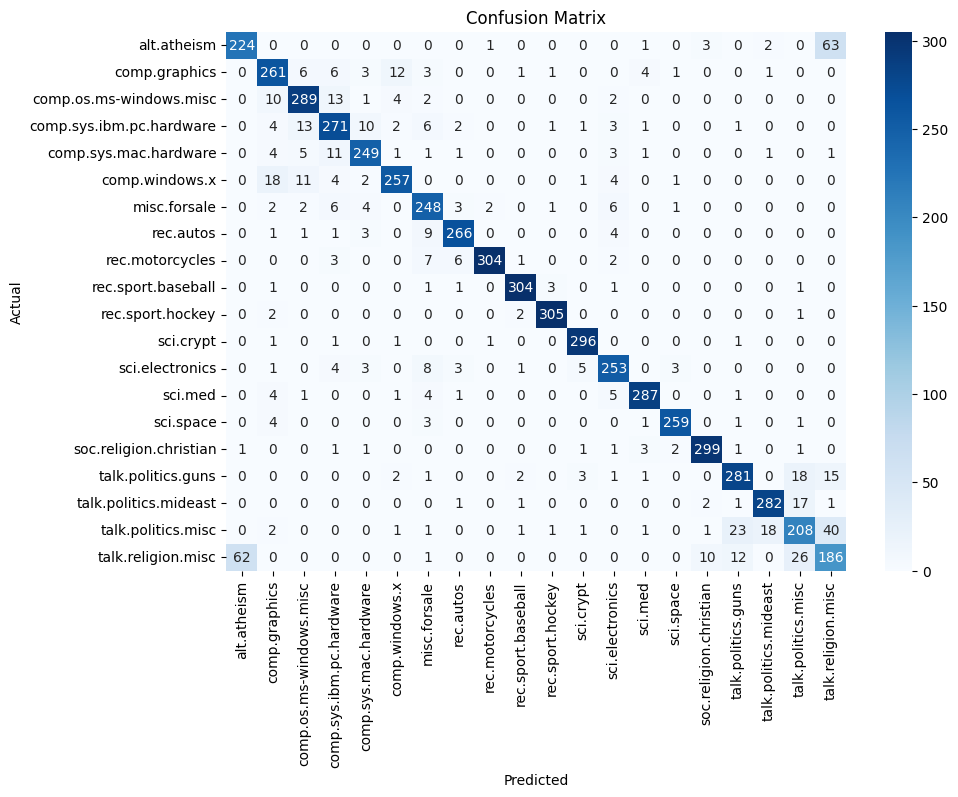

In [ ]:
# Predict on the test set
y_pred = clf_pipe_count_tfidf_custom.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate and print all performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf_pipe_count_tfidf_custom.classes_, yticklabels=clf_pipe_count_tfidf_custom.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
"""
param_grid = {
    'vect__max_df': [0.5, 0.75, 0.9],
    'vect__min_df': [1, 2, 3],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': [None, 1000, 5000],
    'vect__stop_words': [None, 'english'],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'tfidf__smooth_idf': [True, False],
    'tfidf__sublinear_tf': [True, False],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__penalty': ['l2'],
    'clf__dual': [True, False],
    'clf__tol': [1e-4, 1e-3, 1e-2]
}
"""

## Deep Learning

### Data Preparation for Neural Networks

In [ ]:
# Tokenisation
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

90652


In [ ]:
# Creating tokenised datasets
X_train_tokenize = tokenizer.texts_to_sequences(X_train)
X_test_tokenize = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Label Encoding y variables
le = LabelEncoder()
le.fit(y)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
# One hot encode categorical variables for LSTM
y_train_one_hot = tf.keras.utils.to_categorical(y_train_le, num_classes=20)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_le, num_classes=20)

In [ ]:
# Padding
max_length = len(max(X_train_tokenize, key=len))

X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_tokenize, maxlen=max_length, padding='post', truncating='post')
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_tokenize, maxlen=max_length, padding='post', truncating='post')

### Baseline Neural Network

In [ ]:
def create_baseline_cnn_model(vocab_size, max_length, emb_dim=128, nb_filters=64, kernel_size=3, FFN_units=64, nb_classes=20, dropout_rate=0.5):
    model = models.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
        layers.Conv1D(filters=nb_filters, kernel_size=kernel_size, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(units=FFN_units, activation='relu'),
        layers.Dropout(rate=dropout_rate),
        layers.Dense(units=nb_classes, activation='softmax')
    ])

    return model

In [ ]:
VOCAB_SIZE = len(tokenizer.word_index) + 1  # Ensure tokenizer is defined and fitted to your corpus
MAX_LENGTH = 100  # Example maximum sequence length
EMB_DIM = 128
NB_FILTERS = 64
KERNEL_SIZE = 3
FFN_UNITS = 64
NB_CLASSES = len(set(y_train))  # Assuming y_train contains the labels
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
NB_EPOCHS = 10

baseline_cnn_model = create_baseline_cnn_model(
    vocab_size=VOCAB_SIZE,
    max_length=MAX_LENGTH,
    emb_dim=EMB_DIM,
    nb_filters=NB_FILTERS,
    kernel_size=KERNEL_SIZE,
    FFN_units=FFN_UNITS,
    nb_classes=NB_CLASSES,
    dropout_rate=DROPOUT_RATE
)

# Compile the model
baseline_cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
baseline_cnn_model.summary()

# Train the model
history = baseline_cnn_model.fit(
    X_train_pad,  # Ensure X_train_pad is preprocessed and padded
    y_train_one_hot,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCHS,
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - accuracy: 0.1791 - loss: 2.7352
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.7398 - loss: 0.9563
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.8901 - loss: 0.4078
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9351 - loss: 0.2363
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.9507 - loss: 0.1784
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9619 - loss: 0.1382
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9662 - loss: 0.1208
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9661 - loss: 0.1110
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9693 - loss: 0.1011
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9671 - loss: 0.0996


In [ ]:
results = baseline_cnn_model.evaluate(X_test_pad, y_test_one_hot, batch_size=BATCH_SIZE)
print(results)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8378 - loss: 0.6271
[0.635686993598938, 0.8383333086967468]


Text(0.5, 1.0, 'Loss function evolution')

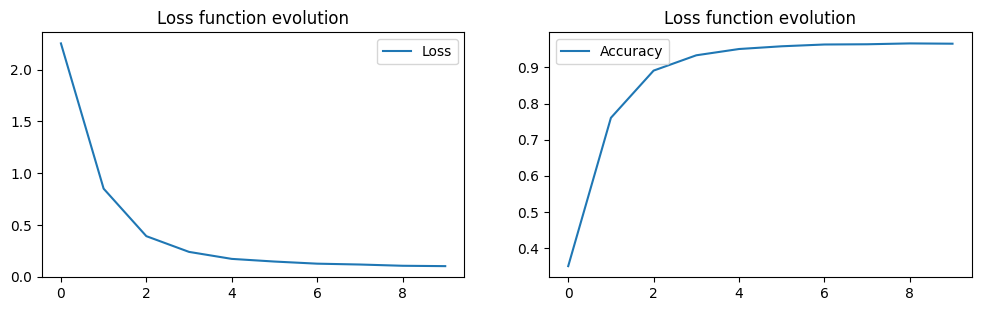

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss function evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Loss function evolution')

### Bi-Directional LSTM

In [ ]:
class LSTM(tf.keras.Model):
    """
    Bi-directional LSTM model for text classification.

    Hyperparameters:
    vocab_size -> The size of the vocabulary, determining the size for the embedding layer, which converts input tokens to dense vectors.
    emb_dim -> The dimension of the dense vectors into which the words will be embedded.
    lstm_units -> The number of units in the LSTM layers.
    FFN_units -> Feed Forward Network units are the number of fully connected layers.
    nb_classes -> The number of output classes for each classification task.
    dropout_rate -> The fraction of input units to drop during training.
    training -> Boolean indicating whether the model is in training mode or not.
    name -> Name of the model.
    """
    def __init__(self, vocab_size, emb_dim=128, lstm_units=64, FFN_units=64, nb_classes=20, dropout_rate=0.5, training=False, name='bilstm_model'):
        super(LSTM, self).__init__(name=name)

        self.embedding = layers.Embedding(vocab_size, emb_dim, input_length=14162)  # Adjust input_length to match sequence length
        self.bilstm_1 = layers.Bidirectional(layers.LSTM(units=lstm_units, return_sequences=True))
        self.bilstm_2 = layers.Bidirectional(layers.LSTM(units=lstm_units // 2))
        self.dense_1 = layers.Dense(units=FFN_units, activation='relu')
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = self.bilstm_1(x)
        x = self.bilstm_2(x)
        x = self.dense_1(x)
        x = self.dropout(x, training=training)
        output = self.last_dense(x)

        return output

In [ ]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
MAX_LENGTH = 100  # Example maximum sequence length
EMB_DIM = 64
LSTM_UNITS = 64
FFN_UNITS = 64
NB_CLASSES = len(set(y_train))
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
NB_EPOCHS = 10

# Initialize the model
lstm_1 = LSTM(
    vocab_size=VOCAB_SIZE,
    emb_dim=EMB_DIM,
    lstm_units=LSTM_UNITS,
    FFN_units=FFN_UNITS,
    nb_classes=NB_CLASSES,
    dropout_rate=DROPOUT_RATE
)

# Compile the model
lstm_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

lstm_1.summary()


In [ ]:
# Train the model
history = lstm_1.fit(
    X_train_pad,
    y_train_one_hot,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCHS
)

In [ ]:
y_train_le.shape

In [ ]:
results = lstm_1.evaluate(X_test_pad, y_test_one_hot, batch_size=BATCH_SIZE)
print(results)

In [ ]:
history.history

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss function evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Loss function evolution')

### CNN (Convolutional Neural Networks)

In [ ]:

class CNN(tf.keras.Model):
    """
    CNN model for text classification.

    Hyperparameters:
    vocab_size -> The size of the vocabulary, determining the size for the embedding layer, which converts input tokens to dense vectors.
    emb_dim -> The dimension of the dense vectors into which the words will be embedded.
    nb_filters -> The number of convolutional filters used within the convolutional layers (each filter learns to detect different patterns within the input text, specific n-grams).
    FFN_units -> Feed Forward Network units are the number of fully connected layers.
    nb_classes -> The number of output classes for each classification task.
    dropout_rate -> The fraction of input units to drop during training.
    training -> Boolean indicating whether the model is in training mode or not.
    name -> Name of the model.
    """
    def __init__(self, vocab_size, emb_dim=128, nb_filters=50, FFN_units=512, nb_classes=20, dropout_rate=0.5, training=False, name='cnn_model'):
        super(CNN, self).__init__(name=name)

        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)

        merged = tf.concat([x_1, x_2, x_3], axis=-1) # (batch_size, 3 * nb_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training=training)
        output = self.last_dense(merged)

        return output

In [ ]:
# Define hyperparameters and other configurations
VOCAB_SIZE = len(tokenizer.word_index) + 1
EMB_DIM = 500
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = len(set(y_train))
DROPOUT_RATE = 0.5
BATCH_SIZE = 8
NB_EPOCHS = 10

# Initialize the model
Dcnn = CNN(
    vocab_size=VOCAB_SIZE,
    emb_dim=EMB_DIM,
    nb_filters=NB_FILTERS,
    FFN_units=FFN_UNITS,
    nb_classes=NB_CLASSES,
    dropout_rate=DROPOUT_RATE
)

# Compile the model
if NB_CLASSES == 2:
    Dcnn.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
else:
    Dcnn.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["sparse_categorical_accuracy"]
    )

# Define checkpoint path and checkpoint manager
checkpoint_path = "./drive/My Drive/projects/CNN_for_NLP/ckpt/"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# Restore the latest checkpoint if it exists
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

# Train the model
history = Dcnn.fit(
    X_train_pad,
    y_train_le,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCHS
)

# Save the model checkpoint
ckpt_manager.save()

In [ ]:
results = Dcnn.evaluate(X_test_pad, y_test_le, batch_size=BATCH_SIZE)
print(results)

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss function evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Loss function evolution')